In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# traning results
#% cd /content/drive/MyDrive/American_University/2021_Spring/CSC-676-001 Computer Vision/GitHub/Project/evaluations

/content/drive/MyDrive/American_University/2021_Spring/CSC-676-001 Computer Vision/GitHub/Project/evaluations


# Some figures in final paper

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving epoch039_img_c.png to epoch039_img_c.png
Saving epoch039_img_g.png to epoch039_img_g.png
Saving epoch039_img_m.png to epoch039_img_m.png
Saving epoch039_img_out.png to epoch039_img_out.png
Saving epoch039_img_rec.png to epoch039_img_rec.png
Saving epoch039_img_truth.png to epoch039_img_truth.png


Text(0.5, 1.0, 'img_truth')

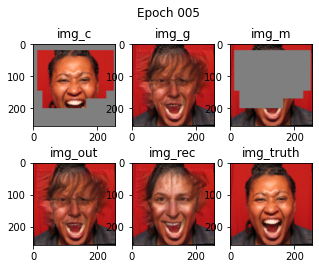

In [ ]:
import imageio
import matplotlib.pyplot as plt
import cv2
import skimage

img_c = imageio.imread("epoch005_img_c.png")
img_g = imageio.imread("epoch005_img_g.png")
img_m = imageio.imread("epoch005_img_m.png")
img_out = imageio.imread("epoch005_img_out.png")
img_rec = imageio.imread("epoch005_img_rec.png")
img_truth = imageio.imread("epoch005_img_truth.png")

# Epoch 005
plt.figure(figsize=(5, 4)) 
plt.suptitle('Epoch 005')
plt.subplot(2,3,1)
plt.imshow(img_c)
plt.title("img_c")
plt.subplot(2,3,2)
plt.imshow(img_g)
plt.title("img_g")
plt.subplot(2,3,3)
plt.imshow(img_m)
plt.title("img_m")
plt.subplot(2,3,4)
plt.imshow(img_out)
plt.title("img_out")
plt.subplot(2,3,5)
plt.imshow(img_rec)
plt.title("img_rec")
plt.subplot(2,3,6)
plt.imshow(img_truth)
plt.title("img_truth")

Text(0.5, 1.0, 'img_truth')

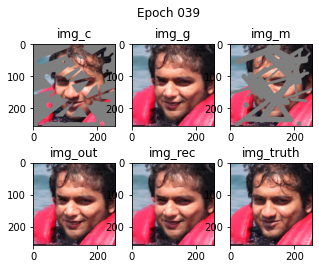

In [ ]:
img_c = imageio.imread("epoch039_img_c.png")
img_g = imageio.imread("epoch039_img_g.png")
img_m = imageio.imread("epoch039_img_m.png")
img_out = imageio.imread("epoch039_img_out.png")
img_rec = imageio.imread("epoch039_img_rec.png")
img_truth = imageio.imread("epoch039_img_truth.png")

# Epoch 039
plt.figure(figsize=(5, 4)) 
plt.suptitle('Epoch 039')
plt.subplot(2,3,1)
plt.imshow(img_c)
plt.title("img_c")
plt.subplot(2,3,2)
plt.imshow(img_g)
plt.title("img_g")
plt.subplot(2,3,3)
plt.imshow(img_m)
plt.title("img_m")
plt.subplot(2,3,4)
plt.imshow(img_out)
plt.title("img_out")
plt.subplot(2,3,5)
plt.imshow(img_rec)
plt.title("img_rec")
plt.subplot(2,3,6)
plt.imshow(img_truth)
plt.title("img_truth")

# Evaluation Metrics
## 0. read the images
- Yunting ground turth vs Yunting_0

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Yunting_out_0.png to Yunting_out_0.png
Saving Yunting_truth.png to Yunting_truth.png


In [3]:
import imageio
import matplotlib.pyplot as plt
import cv2
import skimage

Yunting_turth = imageio.imread("Yunting_truth.png")
Yunting_0 = imageio.imread("Yunting_out_0.png")

(Text(0.5, 1.0, 'Yunting_0.png'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

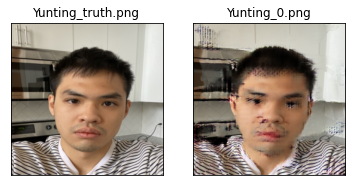

In [4]:
plt.subplot(121),plt.imshow(Yunting_turth)
plt.title('Yunting_truth.png'), plt.xticks([]), plt.yticks([]) # ground turth
plt.subplot(122),plt.imshow(Yunting_0)
plt.title('Yunting_0.png'), plt.xticks([]), plt.yticks([])

## 1. Structural Similarity Index (SSIM) -  the higher the better

## References:
- https://ourcodeworld.com/articles/read/991/how-to-calculate-the-structural-similarity-index-ssim-between-two-images-with-python 
- https://medium.com/srm-mic/all-about-structural-similarity-index-ssim-theory-code-in-pytorch-6551b455541e 
- https://scikit-image.org/docs/0.12.x/api/skimage.measure.html#skimage.measure.compare_ssim 

In [9]:
# Compute the mean structural similarity index between two images (SSIM).

# Yunting_turth vs Yunting_0
from skimage import measure
YuntingSSIM = skimage.measure.compare_ssim(Yunting_turth, Yunting_0, multichannel = True)
teat = skimage.metrics.structural_similarity(Yunting_turth, Yunting_0, multichannel = True)
print("The SSIM of this image is {}".format(YuntingSSIM))
print(teat)

The SSIM of this image is 0.6943020403566461
0.6943020403566461


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  """


## 2. Total variation loss (TV loss) - the lower the better

tf.image.total_variation | TensorFlow Core v2.4.1\
`loss = tf.reduce_sum(tf.image.total_variation(images))`

Total variation loss is the sum of the absolute differences for neighboring pixel-values in the input images. This measures how much noise is in the images.

## Reference:
-  https://www.tensorflow.org/api_docs/python/tf/image/total_variation

In [ ]:
# Total variation loss
import torch
import tensorflow as tf

# return the total variation of image
flipped_images = tf.image.random_flip_left_right(tf.convert_to_tensor(epoch041Img2))
loss = tf.reduce_sum(tf.image.total_variation(flipped_images))

print(loss)

# 3. Peak Signal-to-Noise Ratio (PSNR - the higher the better) 

## References
- https://www.geeksforgeeks.org/python-peak-signal-to-noise-ratio-psnr/
- https://dsp.stackexchange.com/questions/38065/peak-signal-to-noise-ratio-psnr-in-python-for-an-image 

In [ ]:
# PSNR
import numpy 
import math
import cv2
original = Yunting_turth
contrast = Yunting_0
def psnr(img1, img2):
  mse = numpy.mean( (img1 - img2) ** 2 )
  if mse == 0:
    return 100
  PIXEL_MAX = 255.0
  return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

depoch001 = psnr(original,contrast)
print("The PSNR value of this image is {}".format(depoch001))

The PSNR value of this image is 31.729423090550792


Report skeleton


Abstract (5%)

1. Introduction (10%)  
2. Related work (10%)  
3. Approach (and technical correctness) (10%)  
   3.1.  
   3.2.  
4.	Experimental results (and technical correctness) (10%)  
5.	Conclusion (5%)  
6.  References (5%) 


o	Codes, accuracy, reproducibility, and style (20%)   
o	Overall clarity of the report (5%)


Wednesday: 
* 3 scores


Thursday:
* Report
* Submission
* Presentation
